# YEAR WISE NIT AND IIT CUTOFFS

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
#set to display all columns in dataset
pd.set_option("display.max_columns",None)
# import psql to run queries
import pandasql as psql

In [2]:
# load the general data set
data=pd.read_csv(r"C:\Users\hp\21B91A05X9\data.csv",header=0)
# copy t back-up file
data_bk=data.copy()
# display first 5 records
data.head()

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,5,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0


In [3]:
data.info() # display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                64958 non-null  int64 
 1   year              64958 non-null  int64 
 2   institute_type    64958 non-null  object
 3   round_no          64958 non-null  int64 
 4   quota             64958 non-null  object
 5   pool              64958 non-null  object
 6   institute_short   64958 non-null  object
 7   program_name      64958 non-null  object
 8   program_duration  64958 non-null  object
 9   degree_short      64958 non-null  object
 10  category          64958 non-null  object
 11  opening_rank      64958 non-null  int64 
 12  closing_rank      64958 non-null  int64 
 13  is_preparatory    64958 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 6.9+ MB


In [4]:
# count the target variable by 0 or 1
# and their(>=10:1 then it is imbalenced dataset)
is_preparatory_count=data.is_preparatory.value_counts()
print('Class 0:',is_preparatory_count[0])
print('Class 1:',is_preparatory_count[1])
print('Propotion:',round(is_preparatory_count[0]/is_preparatory_count[1],2),':1')
print('Total records:',len(data)) #imbalenced dataset


Class 0: 61864
Class 1: 3094
Propotion: 19.99 :1
Total records: 64958


In [5]:
# display duplicated data
data_dup=data[data.duplicated(keep='last')]
data_dup

,id,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
9205,9206,2021,IIT,1,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,123,2003,0
9206,9207,2021,IIT,1,AI,Female-Only,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,702,4419,0
9207,9208,2021,IIT,1,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,389,1123,0
9208,9209,2021,IIT,1,AI,Female-Only,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,1618,2505,0
9209,9210,2021,IIT,1,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,129,579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64903,31136,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,SC,14185,24048,0
64904,31137,2021,NIT,1,JK,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,2736,4171,0
64905,31138,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,10870,10870,0
64906,31139,2021,NIT,1,LA,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,GEN,166453,265454,0


In [6]:
# droping the duplicates and checking shape of data
data=data.drop_duplicates()
data.shape

(25458, 14)

In [7]:
#re-setting the row index
data=data.reset_index(drop=True)
data_BK2=data.copy()

In [8]:
data.info()  # display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25458 non-null  int64 
 1   year              25458 non-null  int64 
 2   institute_type    25458 non-null  object
 3   round_no          25458 non-null  int64 
 4   quota             25458 non-null  object
 5   pool              25458 non-null  object
 6   institute_short   25458 non-null  object
 7   program_name      25458 non-null  object
 8   program_duration  25458 non-null  object
 9   degree_short      25458 non-null  object
 10  category          25458 non-null  object
 11  opening_rank      25458 non-null  int64 
 12  closing_rank      25458 non-null  int64 
 13  is_preparatory    25458 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 2.7+ MB


In [9]:
# displaying the unique values of all the variables
data.nunique()

id                  25458
year                    6
institute_type          2
round_no                4
quota                   7
pool                    2
institute_short        54
program_name          130
program_duration        2
degree_short           13
category               10
opening_rank        10984
closing_rank        11940
is_preparatory          2
dtype: int64

In [10]:
# displaying the missing values information of variables
data.isnull().sum()

id                  0
year                0
institute_type      0
round_no            0
quota               0
pool                0
institute_short     0
program_name        0
program_duration    0
degree_short        0
category            0
opening_rank        0
closing_rank        0
is_preparatory      0
dtype: int64

In [11]:
# deleting 'id' variable
del data['id']
data.head()

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0


In [12]:
#returns a Series containing the counts of unique values. 
data['institute_type'].value_counts()

IIT    13155
NIT    12303
Name: institute_type, dtype: int64

In [13]:
#returns a Series containing the counts of unique values. 
data['quota'].value_counts()

AI    13155
OS     6502
HS     5486
JK      128
GO       95
AP       72
LA       20
Name: quota, dtype: int64

In [14]:
#returns a Series containing the counts of unique values. 
data['pool'].value_counts()

Gender-Neutral    16005
Female-Only        9453
Name: pool, dtype: int64

In [15]:
#returns a Series containing the counts of unique values. 
data['institute_short'].value_counts()

IIT-Kharagpur              2120
IIT-(BHU) Varanasi         1088
NIT-Rourkela               1054
IIT-Bombay                 1034
IIT-Delhi                  1018
IIT-Roorkee                 989
IIT-Madras                  949
IIT-Kanpur                  844
NIT-Raipur                  748
IIT-(ISM) Dhanbad           739
NIT-Calicut                 695
NIT-Hamirpur                686
NIT-Jalandhar               649
NIT-Karnataka-Surathkal     632
NIT-Bhopal                  624
NIT-Durgapur                605
NIT-Allahabad               605
IIT-Bhubaneswar             582
NIT-Agartala                561
NIT-Jaipur                  549
IIT-Guwahati                531
IIT-Hyderabad               484
NIT-Kurukshetra             477
NIT-Patna                   468
NIT-Jamshedpur              460
NIT-Srinagar                439
NIT-Silchar                 409
IIT-Ropar                   311
NIT-Warangal                306
NIT-Tiruchirappalli         303
IIT-Patna                   290
IIT-Mand

In [16]:
#returns a Series containing the counts of unique values. 
data['program_name'].value_counts()

Computer Science and Engineering                                                                          3330
Mechanical Engineering                                                                                    2774
Civil Engineering                                                                                         2566
Electrical Engineering                                                                                    2279
Electronics and Communication Engineering                                                                 1869
                                                                                                          ... 
Manufacturing Science and Engineering with M.Tech. in Industrial andSystems Engineering and Management       7
Industrial and Systems Engineering with M.Tech. in Industrial and SystemsEngineering and Management          7
Agricultural and Food Engineering with M.Tech. in any of the listedspecializations                           7
E

In [17]:
#returns a Series containing the counts of unique values. 
data['degree_short'].value_counts()

B.Tech                   20456
B.Tech + M.Tech (IDD)     2560
BSc                        590
B.Arch                     538
Int MSc.                   298
Btech + M.Tech (IDD)       293
Int M.Tech                 249
Int Msc.                   233
BS + MS (IDD)              110
BSc + MSc (IDD)             69
B.Plan                      54
B.Pharm                      4
B.Pharm + M.Pharm            4
Name: degree_short, dtype: int64

In [18]:
#returns a Series containing the counts of unique values. 
data['category'].value_counts()

GEN            5252
OBC-NCL        4986
SC             4908
ST             4327
GEN-EWS        3205
GEN-PWD        1565
OBC-NCL-PWD     770
GEN-EWS-PWD     185
SC-PWD          182
ST-PWD           78
Name: category, dtype: int64

In [19]:
# LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical to numerical labels.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
#Fit label encoder. Fit label encoder and return encoded labels
data['category']=LE.fit_transform(data['category'])
data['quota']=LE.fit_transform(data['quota'])
data['institute_type']=LE.fit_transform(data['institute_type'])
data['degree_short']=LE.fit_transform(data['degree_short'])
data['pool']=LE.fit_transform(data['pool'])
data['institute_short']=LE.fit_transform(data['institute_short'])
data['program_name']=LE.fit_transform(data['program_name'])
data.head()


,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,2016,0,6,0,1,4,0,4 Years,4,0,838,1841,0
1,2016,0,6,0,1,4,0,4 Years,4,4,408,1098,0
2,2016,0,6,0,1,4,0,4 Years,4,6,297,468,0
3,2016,0,6,0,1,4,0,4 Years,4,8,79,145,0
4,2016,0,6,0,1,4,0,4 Years,4,3,94,94,0


In [20]:
# deleting 2 variables
data=data.drop(['year','program_duration'],axis=1)
data.head()

,institute_type,round_no,quota,pool,institute_short,program_name,degree_short,category,opening_rank,closing_rank,is_preparatory
0,0,6,0,1,4,0,4,0,838,1841,0
1,0,6,0,1,4,0,4,4,408,1098,0
2,0,6,0,1,4,0,4,6,297,468,0
3,0,6,0,1,4,0,4,8,79,145,0
4,0,6,0,1,4,0,4,3,94,94,0


In [21]:
# identifying the independent and target variables
IndepVar=[]
for col in data.columns:
    if col !='is_preparatory':
        IndepVar.append(col)
TargetVar='is_preparatory'
x=data[IndepVar]
y=data[TargetVar]

In [22]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.125)
x_over, y_over = oversample.fit_resample(x, y)
print(x_over.shape)
print(y_over.shape)

(27617, 10)
(27617,)


In [23]:
# Splitting the dataset into train and test 

 

from sklearn.model_selection import train_test_split

 

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

 

# Display the shape 

 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((19331, 10), (8286, 10), (19331,), (8286,))

In [24]:
# performing scaling(normalization)
from sklearn.preprocessing import MinMaxScaler
mnscaler=MinMaxScaler(feature_range=(0,1))
x_train=mnscaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=mnscaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [25]:
# displaying the train data
x_train.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,0.5,0.0,1.000000,0.100775,0.333333,0.666667,0.004497,0.004252
1,1.0,0.0,1.0,1.0,0.924528,0.325581,0.333333,0.444444,0.003998,0.005915
2,0.0,0.0,0.0,1.0,0.018868,0.364341,0.333333,0.111111,0.000642,0.000769
3,0.0,1.0,0.0,1.0,0.132075,0.697674,0.333333,0.000000,0.005845,0.006844
4,0.0,1.0,0.0,1.0,0.188679,0.511628,0.333333,0.444444,0.001786,0.001697


In [26]:
# displaying test data
x_test.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.166667,0.0,1.0,0.075472,0.782946,0.416667,0.333333,0.000211,0.000118
1,1.0,0.000000,1.0,1.0,0.603774,0.364341,0.333333,0.111111,0.004959,0.002806
2,1.0,0.000000,0.5,0.0,0.905660,0.325581,0.333333,0.000000,0.018284,0.021126
3,0.0,1.000000,0.0,0.0,0.075472,0.000000,0.333333,0.888889,0.000977,0.000548
4,1.0,0.000000,0.5,1.0,0.905660,0.325581,0.333333,0.555556,0.000621,0.000349


# Bulding Algorithms

# KNN Algorithm

In [28]:
# load the dataset for KNN
KNN_Results=pd.read_csv(r"C:\Users\Dlc\Downloads\KNN_Results (1).csv",header=0)

KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 862   66]
 [ 156 7202]]
Outcome values : 
 862 66 156 7202
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.93      0.89       928
           0       0.99      0.98      0.98      7358

    accuracy                           0.97      8286
   macro avg       0.92      0.95      0.94      8286
weighted avg       0.97      0.97      0.97      8286

Accuracy : 97.3 %
Precision : 84.7 %
Recall : 92.9 %
F1 Score : 0.886
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 95.4 %
MCC : 0.872
roc_auc_score: 0.954


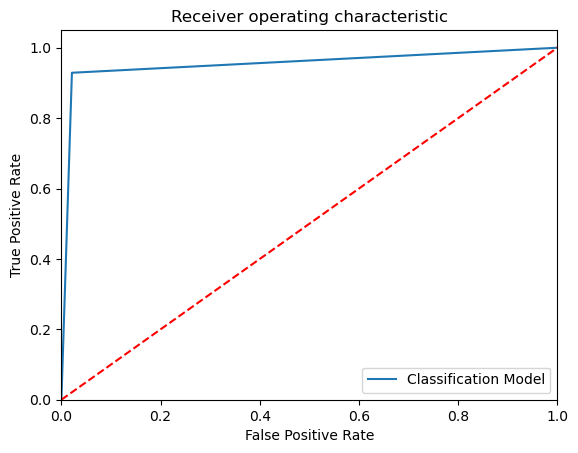

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 752  176]
 [ 128 7230]]
Outcome values : 
 752 176 128 7230
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.81      0.83       928
           0       0.98      0.98      0.98      7358

    accuracy                           0.96      8286
   macro avg       0.92      0.90      0.91      8286
weighted avg       0.96      0.96      0.96      8286

Accuracy : 96.3 %
Precision : 85.5 %
Recall : 81.0 %
F1 Score : 0.832
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 89.7 %
MCC : 0.812
roc_auc_score: 0.896


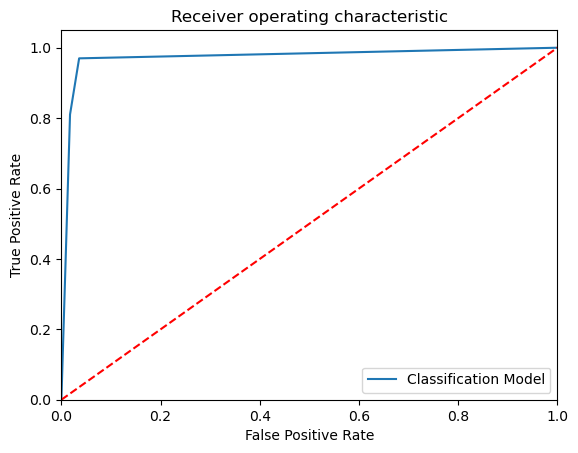

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 827  101]
 [ 224 7134]]
Outcome values : 
 827 101 224 7134
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.89      0.84       928
           0       0.99      0.97      0.98      7358

    accuracy                           0.96      8286
   macro avg       0.89      0.93      0.91      8286
weighted avg       0.96      0.96      0.96      8286

Accuracy : 96.1 %
Precision : 78.7 %
Recall : 89.1 %
F1 Score : 0.836
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 93.0 %
MCC : 0.816
roc_auc_score: 0.93


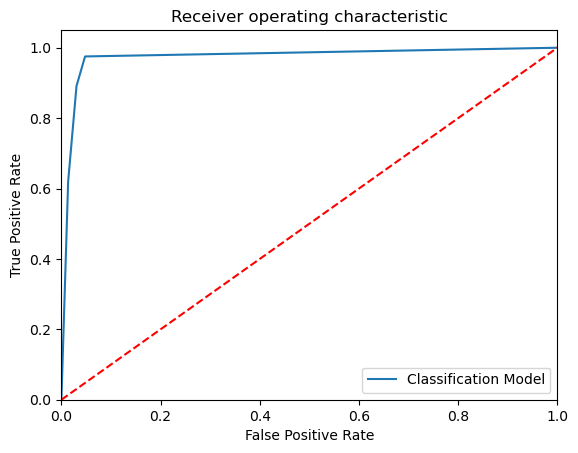

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 702  226]
 [ 180 7178]]
Outcome values : 
 702 226 180 7178
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.76      0.78       928
           0       0.97      0.98      0.97      7358

    accuracy                           0.95      8286
   macro avg       0.88      0.87      0.87      8286
weighted avg       0.95      0.95      0.95      8286

Accuracy : 95.1 %
Precision : 79.6 %
Recall : 75.6 %
F1 Score : 0.776
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 86.6 %
MCC : 0.749
roc_auc_score: 0.866


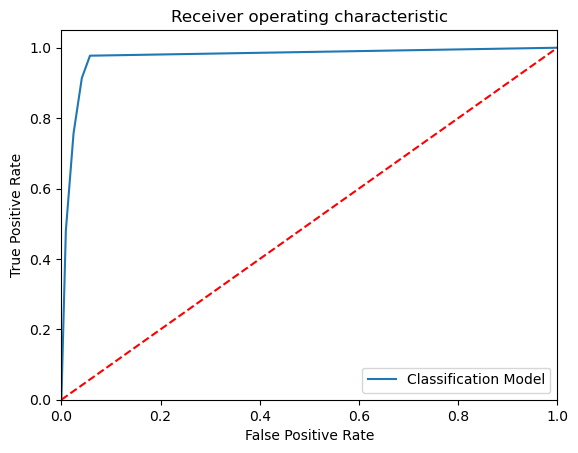

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 755  173]
 [ 253 7105]]
Outcome values : 
 755 173 253 7105
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.81      0.78       928
           0       0.98      0.97      0.97      7358

    accuracy                           0.95      8286
   macro avg       0.86      0.89      0.88      8286
weighted avg       0.95      0.95      0.95      8286

Accuracy : 94.9 %
Precision : 74.9 %
Recall : 81.4 %
F1 Score : 0.78
Specificity or True Negative Rate : 96.6 %
Balanced Accuracy : 89.0 %
MCC : 0.752
roc_auc_score: 0.89


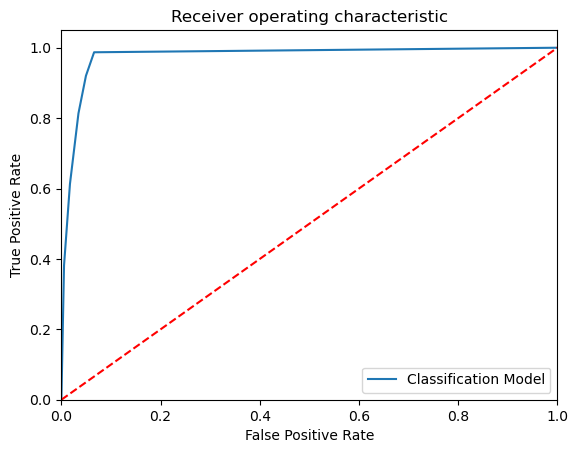

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 639  289]
 [ 182 7176]]
Outcome values : 
 639 289 182 7176
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.69      0.73       928
           0       0.96      0.98      0.97      7358

    accuracy                           0.94      8286
   macro avg       0.87      0.83      0.85      8286
weighted avg       0.94      0.94      0.94      8286

Accuracy : 94.3 %
Precision : 77.8 %
Recall : 68.9 %
F1 Score : 0.731
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 83.2 %
MCC : 0.701
roc_auc_score: 0.832


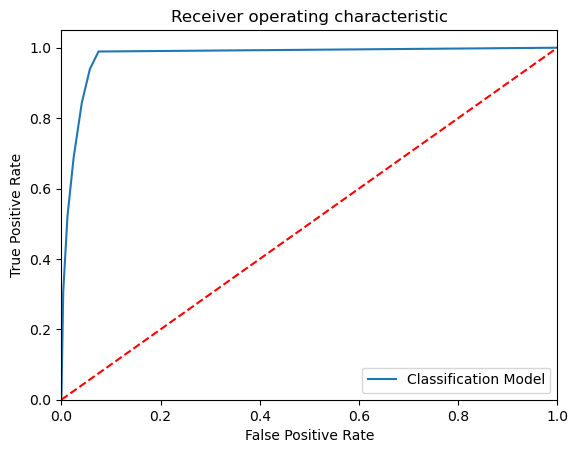

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 696  232]
 [ 233 7125]]
Outcome values : 
 696 232 233 7125
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.75      0.75       928
           0       0.97      0.97      0.97      7358

    accuracy                           0.94      8286
   macro avg       0.86      0.86      0.86      8286
weighted avg       0.94      0.94      0.94      8286

Accuracy : 94.4 %
Precision : 74.9 %
Recall : 75.0 %
F1 Score : 0.75
Specificity or True Negative Rate : 96.8 %
Balanced Accuracy : 85.9 %
MCC : 0.718
roc_auc_score: 0.859


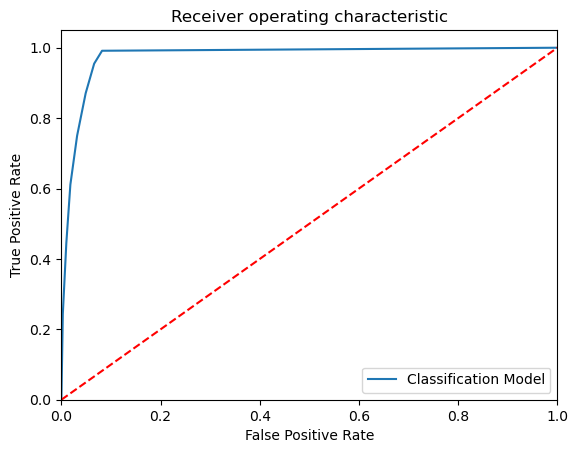

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 609  319]
 [ 167 7191]]
Outcome values : 
 609 319 167 7191
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.66      0.71       928
           0       0.96      0.98      0.97      7358

    accuracy                           0.94      8286
   macro avg       0.87      0.82      0.84      8286
weighted avg       0.94      0.94      0.94      8286

Accuracy : 94.1 %
Precision : 78.5 %
Recall : 65.6 %
F1 Score : 0.715
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 81.6 %
MCC : 0.686
roc_auc_score: 0.817


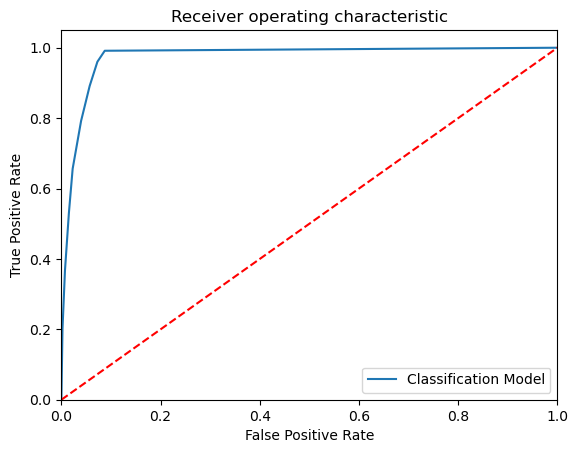

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 649  279]
 [ 220 7138]]
Outcome values : 
 649 279 220 7138
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.70      0.72       928
           0       0.96      0.97      0.97      7358

    accuracy                           0.94      8286
   macro avg       0.85      0.83      0.84      8286
weighted avg       0.94      0.94      0.94      8286

Accuracy : 94.0 %
Precision : 74.7 %
Recall : 69.9 %
F1 Score : 0.722
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 83.4 %
MCC : 0.689
roc_auc_score: 0.835


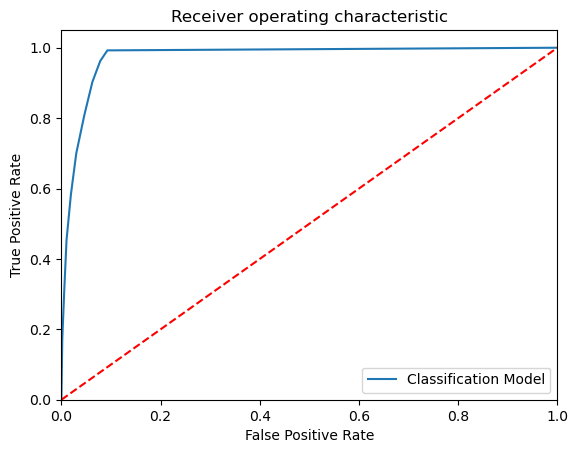

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 590  338]
 [ 190 7168]]
Outcome values : 
 590 338 190 7168
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.64      0.69       928
           0       0.95      0.97      0.96      7358

    accuracy                           0.94      8286
   macro avg       0.86      0.80      0.83      8286
weighted avg       0.93      0.94      0.93      8286

Accuracy : 93.6 %
Precision : 75.6 %
Recall : 63.6 %
F1 Score : 0.691
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 80.5 %
MCC : 0.659
roc_auc_score: 0.805


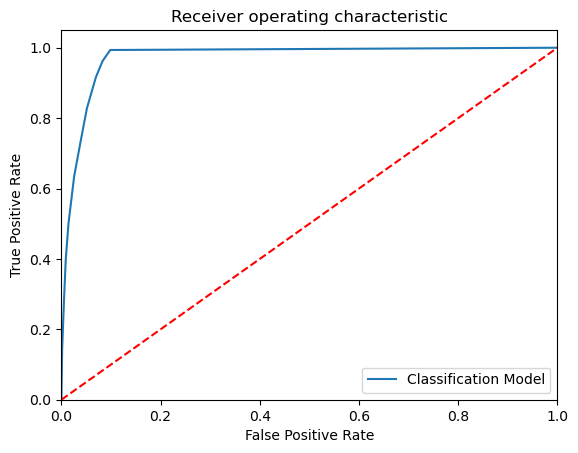

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 622  306]
 [ 238 7120]]
Outcome values : 
 622 306 238 7120
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.67      0.70       928
           0       0.96      0.97      0.96      7358

    accuracy                           0.93      8286
   macro avg       0.84      0.82      0.83      8286
weighted avg       0.93      0.93      0.93      8286

Accuracy : 93.4 %
Precision : 72.3 %
Recall : 67.0 %
F1 Score : 0.696
Specificity or True Negative Rate : 96.8 %
Balanced Accuracy : 81.9 %
MCC : 0.66
roc_auc_score: 0.819


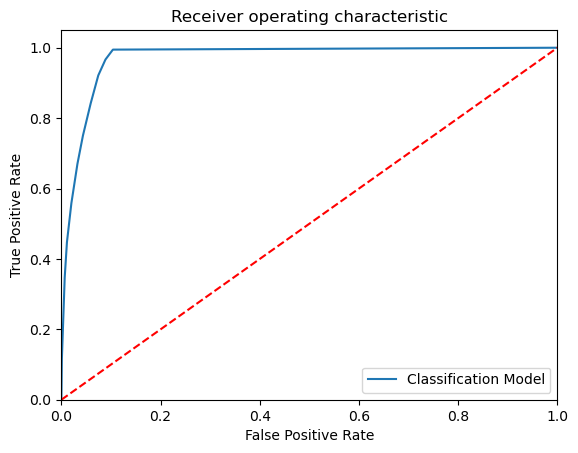

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 555  373]
 [ 195 7163]]
Outcome values : 
 555 373 195 7163
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.60      0.66       928
           0       0.95      0.97      0.96      7358

    accuracy                           0.93      8286
   macro avg       0.85      0.79      0.81      8286
weighted avg       0.93      0.93      0.93      8286

Accuracy : 93.1 %
Precision : 74.0 %
Recall : 59.8 %
F1 Score : 0.662
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 78.6 %
MCC : 0.628
roc_auc_score: 0.786


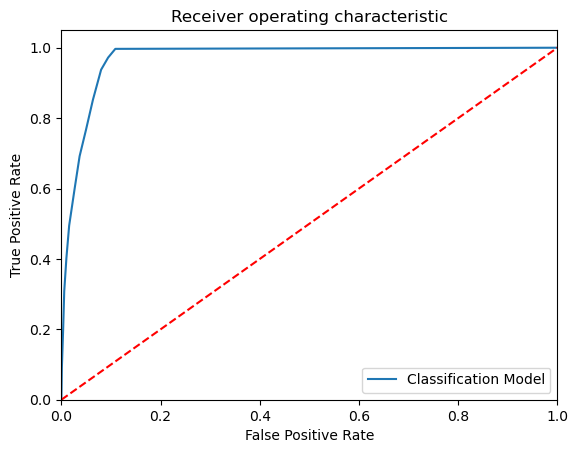

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 589  339]
 [ 228 7130]]
Outcome values : 
 589 339 228 7130
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.63      0.68       928
           0       0.95      0.97      0.96      7358

    accuracy                           0.93      8286
   macro avg       0.84      0.80      0.82      8286
weighted avg       0.93      0.93      0.93      8286

Accuracy : 93.2 %
Precision : 72.1 %
Recall : 63.5 %
F1 Score : 0.675
Specificity or True Negative Rate : 96.9 %
Balanced Accuracy : 80.2 %
MCC : 0.639
roc_auc_score: 0.802


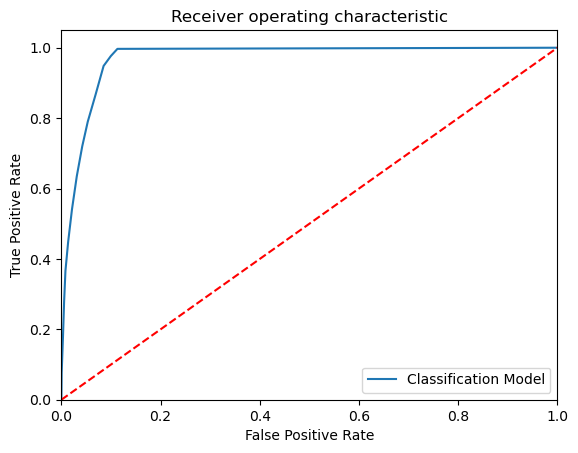

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 541  387]
 [ 191 7167]]
Outcome values : 
 541 387 191 7167
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.58      0.65       928
           0       0.95      0.97      0.96      7358

    accuracy                           0.93      8286
   macro avg       0.84      0.78      0.81      8286
weighted avg       0.93      0.93      0.93      8286

Accuracy : 93.0 %
Precision : 73.9 %
Recall : 58.3 %
F1 Score : 0.652
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 77.8 %
MCC : 0.619
roc_auc_score: 0.779


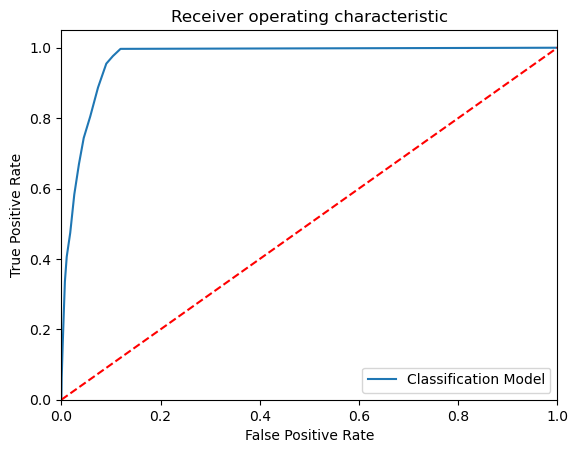

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 572  356]
 [ 222 7136]]
Outcome values : 
 572 356 222 7136
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.62      0.66       928
           0       0.95      0.97      0.96      7358

    accuracy                           0.93      8286
   macro avg       0.84      0.79      0.81      8286
weighted avg       0.93      0.93      0.93      8286

Accuracy : 93.0 %
Precision : 72.0 %
Recall : 61.6 %
F1 Score : 0.664
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 79.3 %
MCC : 0.628
roc_auc_score: 0.793


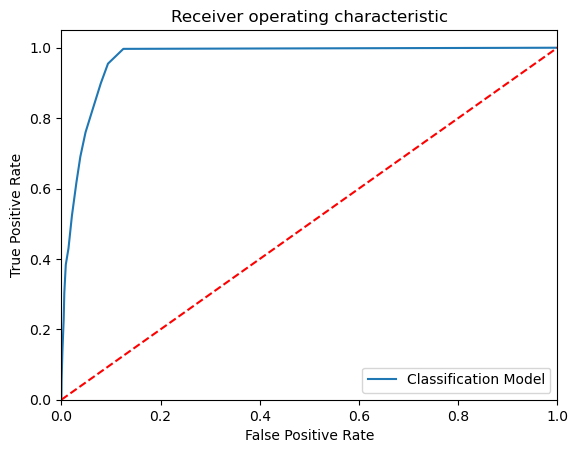

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 516  412]
 [ 185 7173]]
Outcome values : 
 516 412 185 7173
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.56      0.63       928
           0       0.95      0.97      0.96      7358

    accuracy                           0.93      8286
   macro avg       0.84      0.77      0.80      8286
weighted avg       0.92      0.93      0.92      8286

Accuracy : 92.8 %
Precision : 73.6 %
Recall : 55.6 %
F1 Score : 0.634
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 76.6 %
MCC : 0.602
roc_auc_score: 0.765


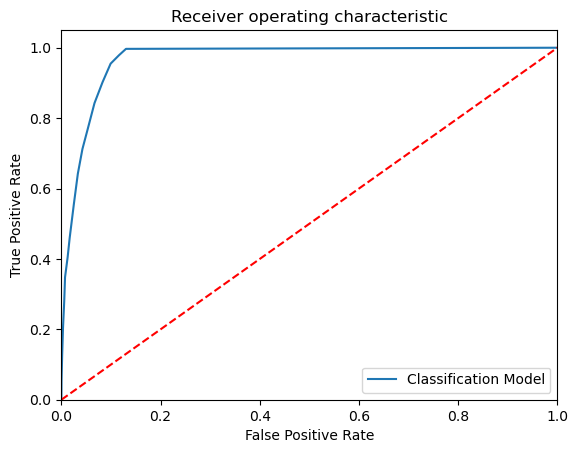

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 547  381]
 [ 211 7147]]
Outcome values : 
 547 381 211 7147
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.59      0.65       928
           0       0.95      0.97      0.96      7358

    accuracy                           0.93      8286
   macro avg       0.84      0.78      0.80      8286
weighted avg       0.92      0.93      0.93      8286

Accuracy : 92.9 %
Precision : 72.2 %
Recall : 58.9 %
F1 Score : 0.649
Specificity or True Negative Rate : 97.1 %
Balanced Accuracy : 78.0 %
MCC : 0.613
roc_auc_score: 0.78


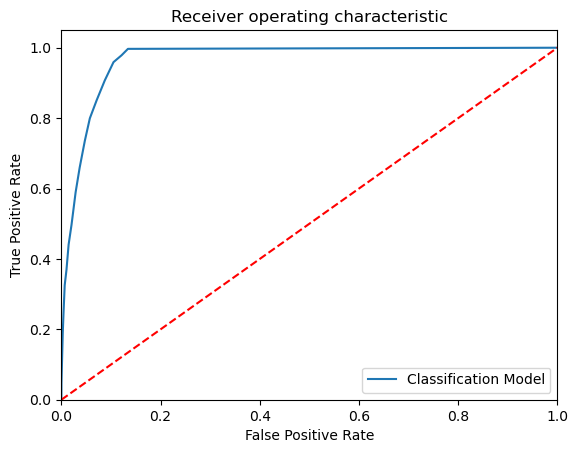

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 483  445]
 [ 172 7186]]
Outcome values : 
 483 445 172 7186
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.52      0.61       928
           0       0.94      0.98      0.96      7358

    accuracy                           0.93      8286
   macro avg       0.84      0.75      0.78      8286
weighted avg       0.92      0.93      0.92      8286

Accuracy : 92.6 %
Precision : 73.7 %
Recall : 52.0 %
F1 Score : 0.61
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 74.8 %
MCC : 0.581
roc_auc_score: 0.749


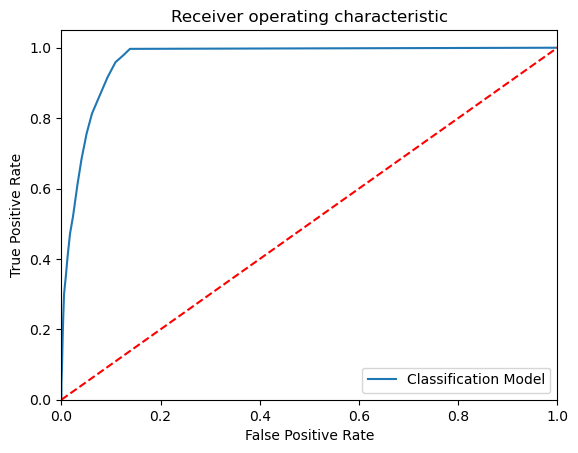

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 509  419]
 [ 205 7153]]
Outcome values : 
 509 419 205 7153
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.55      0.62       928
           0       0.94      0.97      0.96      7358

    accuracy                           0.92      8286
   macro avg       0.83      0.76      0.79      8286
weighted avg       0.92      0.92      0.92      8286

Accuracy : 92.5 %
Precision : 71.3 %
Recall : 54.8 %
F1 Score : 0.62
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 76.0 %
MCC : 0.585
roc_auc_score: 0.76


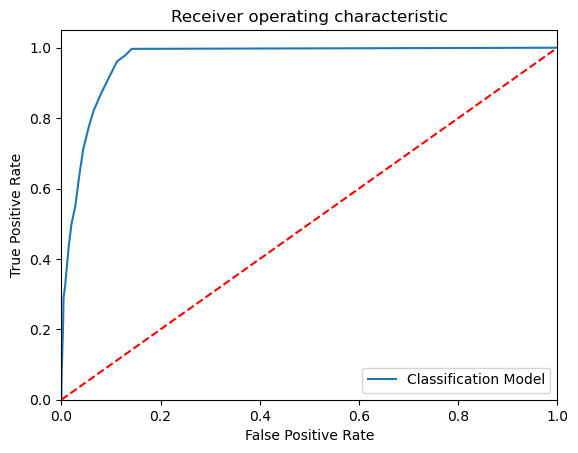

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 486  442]
 [ 175 7183]]
Outcome values : 
 486 442 175 7183
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.52      0.61       928
           0       0.94      0.98      0.96      7358

    accuracy                           0.93      8286
   macro avg       0.84      0.75      0.79      8286
weighted avg       0.92      0.93      0.92      8286

Accuracy : 92.6 %
Precision : 73.5 %
Recall : 52.4 %
F1 Score : 0.612
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 75.0 %
MCC : 0.582
roc_auc_score: 0.75


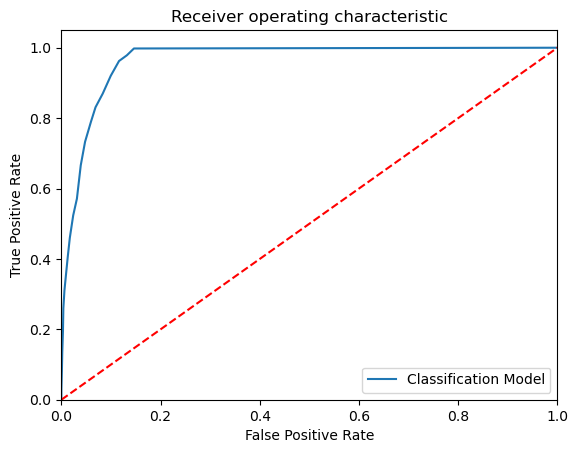

In [29]:
# Build KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [30]:
KNN_Results.head(10) # displaying KNN results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,862,66,156,7202,0.973,0.847,0.929,0.886,0.979,0.872,0.953839,0.954
1,KNeighborsClassifier(n_neighbors=2),2,752,176,128,7230,0.963,0.855,0.810,0.832,0.983,0.812,0.896474,0.897
2,KNeighborsClassifier(n_neighbors=3),3,827,101,224,7134,0.961,0.787,0.891,0.836,0.970,0.816,0.930360,0.930
3,KNeighborsClassifier(n_neighbors=4),4,702,226,180,7178,0.951,0.796,0.756,0.776,0.976,0.749,0.866001,0.866
4,KNeighborsClassifier(),5,755,173,253,7105,0.949,0.749,0.814,0.780,0.966,0.752,0.889597,0.890
5,KNeighborsClassifier(n_neighbors=6),6,639,289,182,7176,0.943,0.778,0.689,0.731,0.975,0.701,0.831921,0.832
6,KNeighborsClassifier(n_neighbors=7),7,696,232,233,7125,0.944,0.749,0.750,0.750,0.968,0.718,0.859167,0.859
7,KNeighborsClassifier(n_neighbors=8),8,609,319,167,7191,0.941,0.785,0.656,0.715,0.977,0.686,0.816777,0.816
8,KNeighborsClassifier(n_neighbors=9),9,649,279,220,7138,0.940,0.747,0.699,0.722,0.970,0.689,0.834727,0.834
9,KNeighborsClassifier(n_neighbors=10),10,590,338,190,7168,0.936,0.756,0.636,0.691,0.974,0.659,0.804977,0.805


# SVM ( Linear Kernal Algorithm)

In [31]:
EMResults=pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults (2).csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  SVM - Linear
Confusion matrix : 
 [[   0  928]
 [   0 7358]]
Outcome values : 
 0 928 0 7358
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       928
           0       0.89      1.00      0.94      7358

    accuracy                           0.89      8286
   macro avg       0.44      0.50      0.47      8286
weighted avg       0.79      0.89      0.84      8286

Accuracy : 88.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


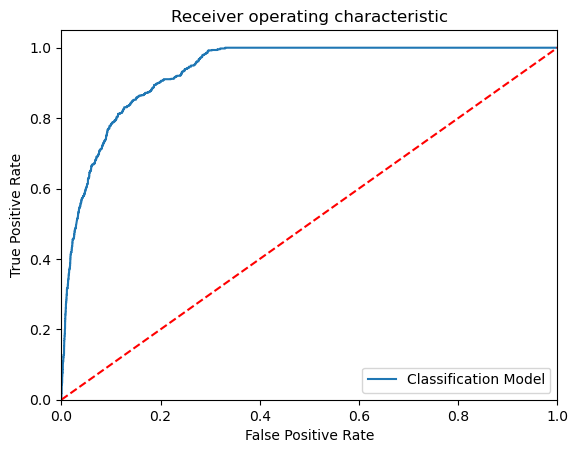

-----------------------------------------------------------------------------------------------------


In [33]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# SVM Polynomial Kernal Algorithm


Model Name:  SVM - Polynominal
Confusion matrix : 
 [[ 352  576]
 [ 120 7238]]
Outcome values : 
 352 576 120 7238
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.38      0.50       928
           0       0.93      0.98      0.95      7358

    accuracy                           0.92      8286
   macro avg       0.84      0.68      0.73      8286
weighted avg       0.91      0.92      0.90      8286

Accuracy : 91.6 %
Precision : 74.6 %
Recall : 37.9 %
F1 Score : 0.503
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 68.2 %
MCC : 0.494
roc_auc_score: 0.682


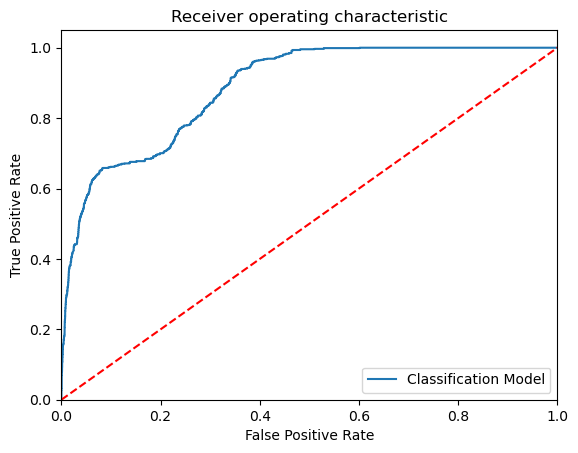

-----------------------------------------------------------------------------------------------------


In [34]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# SVM Gaussian Kernal Algorithm

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 847   81]
 [1449 5909]]
Outcome values : 
 847 81 1449 5909
Classification report : 
               precision    recall  f1-score   support

           1       0.37      0.91      0.53       928
           0       0.99      0.80      0.89      7358

    accuracy                           0.82      8286
   macro avg       0.68      0.86      0.71      8286
weighted avg       0.92      0.82      0.85      8286

Accuracy : 81.5 %
Precision : 36.9 %
Recall : 91.3 %
F1 Score : 0.525
Specificity or True Negative Rate : 80.3 %
Balanced Accuracy : 85.8 %
MCC : 0.504
roc_auc_score: 0.858


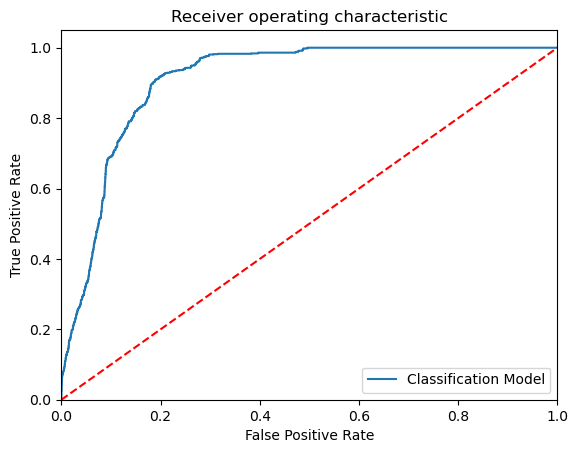

-----------------------------------------------------------------------------------------------------


In [35]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

# SVM Sigmoid Kernal Algorithm

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 592  336]
 [2729 4629]]
Outcome values : 
 592 336 2729 4629
Classification report : 
               precision    recall  f1-score   support

           1       0.18      0.64      0.28       928
           0       0.93      0.63      0.75      7358

    accuracy                           0.63      8286
   macro avg       0.56      0.63      0.51      8286
weighted avg       0.85      0.63      0.70      8286

Accuracy : 63.0 %
Precision : 17.8 %
Recall : 63.8 %
F1 Score : 0.279
Specificity or True Negative Rate : 62.9 %
Balanced Accuracy : 63.4 %
MCC : 0.172
roc_auc_score: 0.634


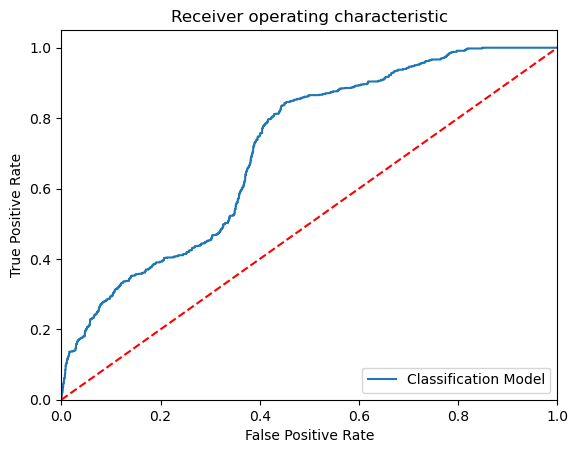

-----------------------------------------------------------------------------------------------------


In [36]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults= EMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [37]:
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,928,0,7358,0.888,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,SVM - Polynominal,352,576,120,7238,0.916,0.746,0.379,0.503,0.984,0.494,0.681501,0.682
2,SVM - Gaussian,847,81,1449,5909,0.815,0.369,0.913,0.525,0.803,0.504,0.857894,0.858
3,SVM - Sigmoid,592,336,2729,4629,0.630,0.178,0.638,0.279,0.629,0.172,0.633521,0.634


# compare the classifcation algorithm

In [38]:
# load dataset for all Algorithms
EMResults=pd.read_csv(r"C:\Users\Dlc\Downloads\EMResults (2).csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 236  692]
 [  95 7263]]
Outcome values : 
 236 692 95 7263
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.25      0.37       928
           0       0.91      0.99      0.95      7358

    accuracy                           0.91      8286
   macro avg       0.81      0.62      0.66      8286
weighted avg       0.89      0.91      0.88      8286

Accuracy : 90.5 %
Precision : 71.3 %
Recall : 25.4 %
F1 Score : 0.375
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 62.0 %
MCC : 0.389
roc_auc_score: 0.621


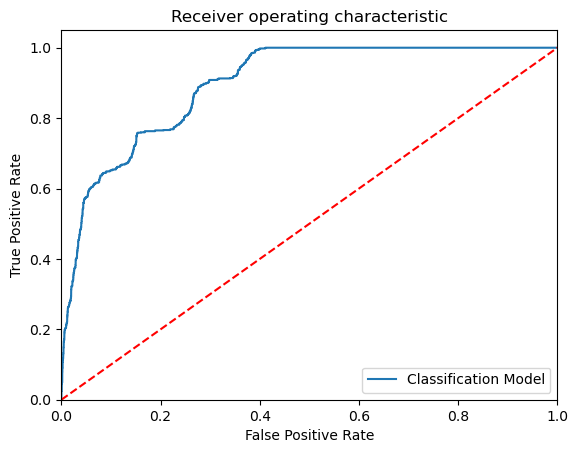

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 655  273]
 [ 160 7198]]
Outcome values : 
 655 273 160 7198
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.71      0.75       928
           0       0.96      0.98      0.97      7358

    accuracy                           0.95      8286
   macro avg       0.88      0.84      0.86      8286
weighted avg       0.95      0.95      0.95      8286

Accuracy : 94.8 %
Precision : 80.4 %
Recall : 70.6 %
F1 Score : 0.752
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 84.2 %
MCC : 0.724
roc_auc_score: 0.842


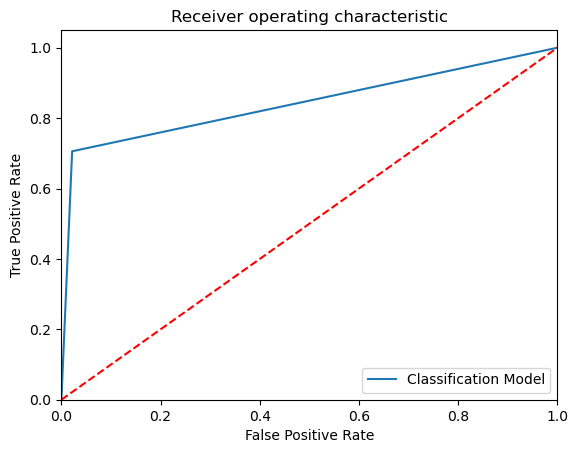

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 680  248]
 [  77 7281]]
Outcome values : 
 680 248 77 7281
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.73      0.81       928
           0       0.97      0.99      0.98      7358

    accuracy                           0.96      8286
   macro avg       0.93      0.86      0.89      8286
weighted avg       0.96      0.96      0.96      8286

Accuracy : 96.1 %
Precision : 89.8 %
Recall : 73.3 %
F1 Score : 0.807
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 86.1 %
MCC : 0.791
roc_auc_score: 0.861


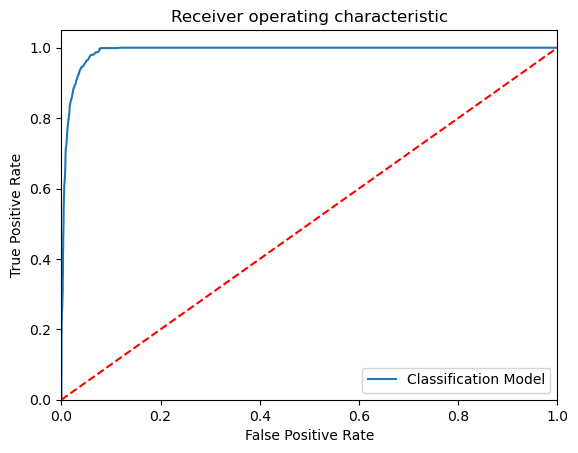

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 717  211]
 [  79 7279]]
Outcome values : 
 717 211 79 7279
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.77      0.83       928
           0       0.97      0.99      0.98      7358

    accuracy                           0.97      8286
   macro avg       0.94      0.88      0.91      8286
weighted avg       0.96      0.97      0.96      8286

Accuracy : 96.5 %
Precision : 90.1 %
Recall : 77.3 %
F1 Score : 0.832
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 88.1 %
MCC : 0.815
roc_auc_score: 0.881


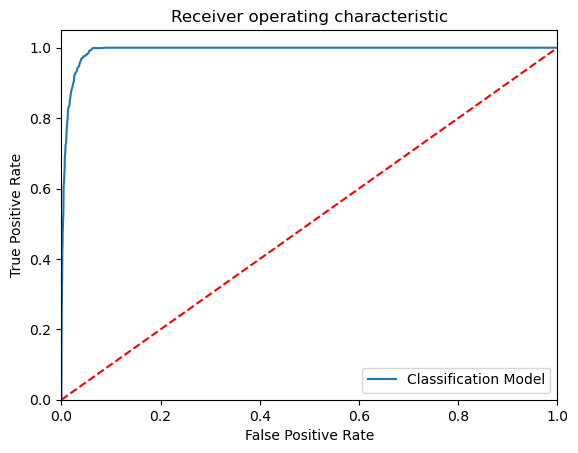

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 862   66]
 [ 156 7202]]
Outcome values : 
 862 66 156 7202
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.93      0.89       928
           0       0.99      0.98      0.98      7358

    accuracy                           0.97      8286
   macro avg       0.92      0.95      0.94      8286
weighted avg       0.97      0.97      0.97      8286

Accuracy : 97.3 %
Precision : 84.7 %
Recall : 92.9 %
F1 Score : 0.886
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 95.4 %
MCC : 0.872
roc_auc_score: 0.954


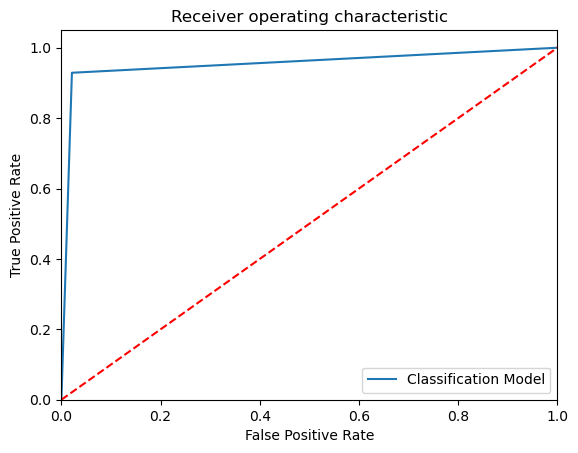

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 924    4]
 [2079 5279]]
Outcome values : 
 924 4 2079 5279
Classification report : 
               precision    recall  f1-score   support

           1       0.31      1.00      0.47       928
           0       1.00      0.72      0.84      7358

    accuracy                           0.75      8286
   macro avg       0.65      0.86      0.65      8286
weighted avg       0.92      0.75      0.79      8286

Accuracy : 74.9 %
Precision : 30.8 %
Recall : 99.6 %
F1 Score : 0.47
Specificity or True Negative Rate : 71.7 %
Balanced Accuracy : 85.6 %
MCC : 0.468
roc_auc_score: 0.857


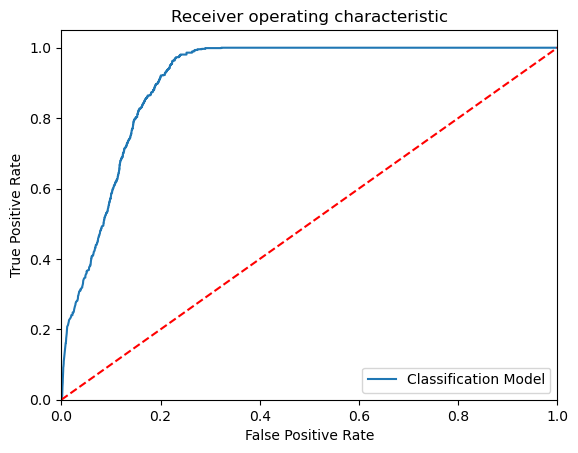

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[ 847   81]
 [1449 5909]]
Outcome values : 
 847 81 1449 5909
Classification report : 
               precision    recall  f1-score   support

           1       0.37      0.91      0.53       928
           0       0.99      0.80      0.89      7358

    accuracy                           0.82      8286
   macro avg       0.68      0.86      0.71      8286
weighted avg       0.92      0.82      0.85      8286

Accuracy : 81.5 %
Precision : 36.9 %
Recall : 91.3 %
F1 Score : 0.525
Specificity or True Negative Rate : 80.3 %
Balanced Accuracy : 85.8 %
MCC : 0.504
roc_auc_score: 0.858


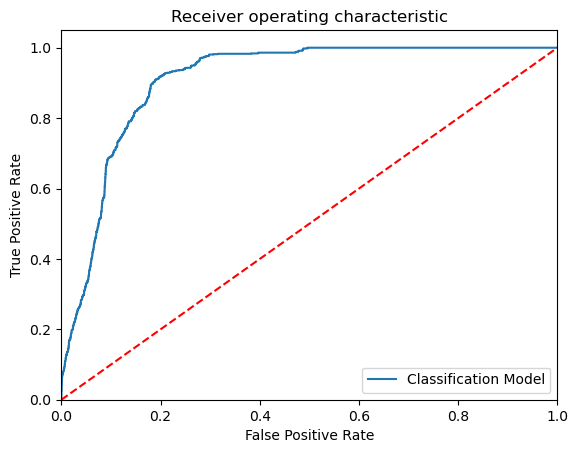

-----------------------------------------------------------------------------------------------------


In [39]:


# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=1)
ModelGNB = GaussianNB()
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced',probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelGNB, ModelSVM]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>



In [40]:
EMResults.head(10) # displaying EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),236,692,95,7263,0.905,0.713,0.254,0.375,0.987,0.389,0.620700,0.620
1,DecisionTreeClassifier(),655,273,160,7198,0.948,0.804,0.706,0.752,0.978,0.724,0.842037,0.842
2,"(DecisionTreeClassifier(max_features='auto', r...",680,248,77,7281,0.961,0.898,0.733,0.807,0.990,0.791,0.861147,0.861
3,"(ExtraTreeClassifier(random_state=1749979534),...",717,211,79,7279,0.965,0.901,0.773,0.832,0.989,0.815,0.880946,0.881
4,KNeighborsClassifier(n_neighbors=1),862,66,156,7202,0.973,0.847,0.929,0.886,0.979,0.872,0.953839,0.954
5,GaussianNB(),924,4,2079,5279,0.749,0.308,0.996,0.470,0.717,0.468,0.856570,0.856
6,"SVC(class_weight='balanced', probability=True,...",847,81,1449,5909,0.815,0.369,0.913,0.525,0.803,0.504,0.857894,0.858


# KNN Algoithm

In [41]:
y_predKNN=ModelKNN.predict(x_test) #predicting target variable(is_preparatory) by applying test data


In [43]:
Results = pd.DataFrame({'is_preparatory_A':y_test, 'is_preparatory_P':y_predKNN})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = data.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(10)

,institute_type,round_no,quota,pool,institute_short,program_name,degree_short,category,opening_rank,closing_rank,is_preparatory,is_preparatory_A,is_preparatory_P
21299,1,6,6,0,49,28,4,4,21223,21330,0,0,0
7719,0,6,0,1,13,42,4,5,56,56,0,0,1
6400,0,7,0,1,2,98,4,1,1054,1118,0,0,0
4903,0,7,0,1,14,0,4,0,1854,3497,0,0,0
3062,0,7,0,0,16,32,4,4,2507,2673,0,0,0
6388,0,7,0,0,2,47,4,6,2701,2701,0,0,0
5186,0,7,0,1,20,7,0,1,2131,2131,0,0,0
20152,1,6,6,0,45,57,4,4,9622,9918,0,0,0
11968,0,2,0,1,4,31,7,1,1100,1147,0,0,0
21871,1,1,3,1,33,98,4,5,641,641,0,0,0
